In [104]:
from ensurepip import bootstrap
from unittest import skipIf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 167. Coding Classification with Random Forest Classifier - Part One

In [105]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [106]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [107]:
df = df.dropna()

In [108]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [109]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [110]:
y = df['species']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc = RandomForestClassifier(
    n_estimators=10, 
    n_jobs=-1, 
    max_features='sqrt',
    random_state=101,
)

In [115]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=101)

In [116]:
rfc_pred = rfc.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

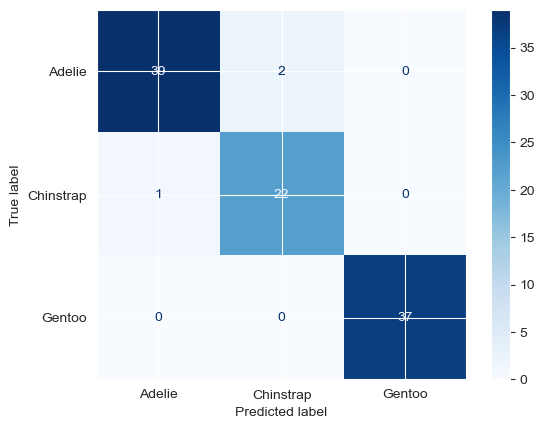

In [118]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_pred), display_labels=rfc.classes_).plot(cmap='Blues')

In [119]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



# 168. Coding Classification with Random Forest Classifier - Part Two

In [120]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [121]:
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


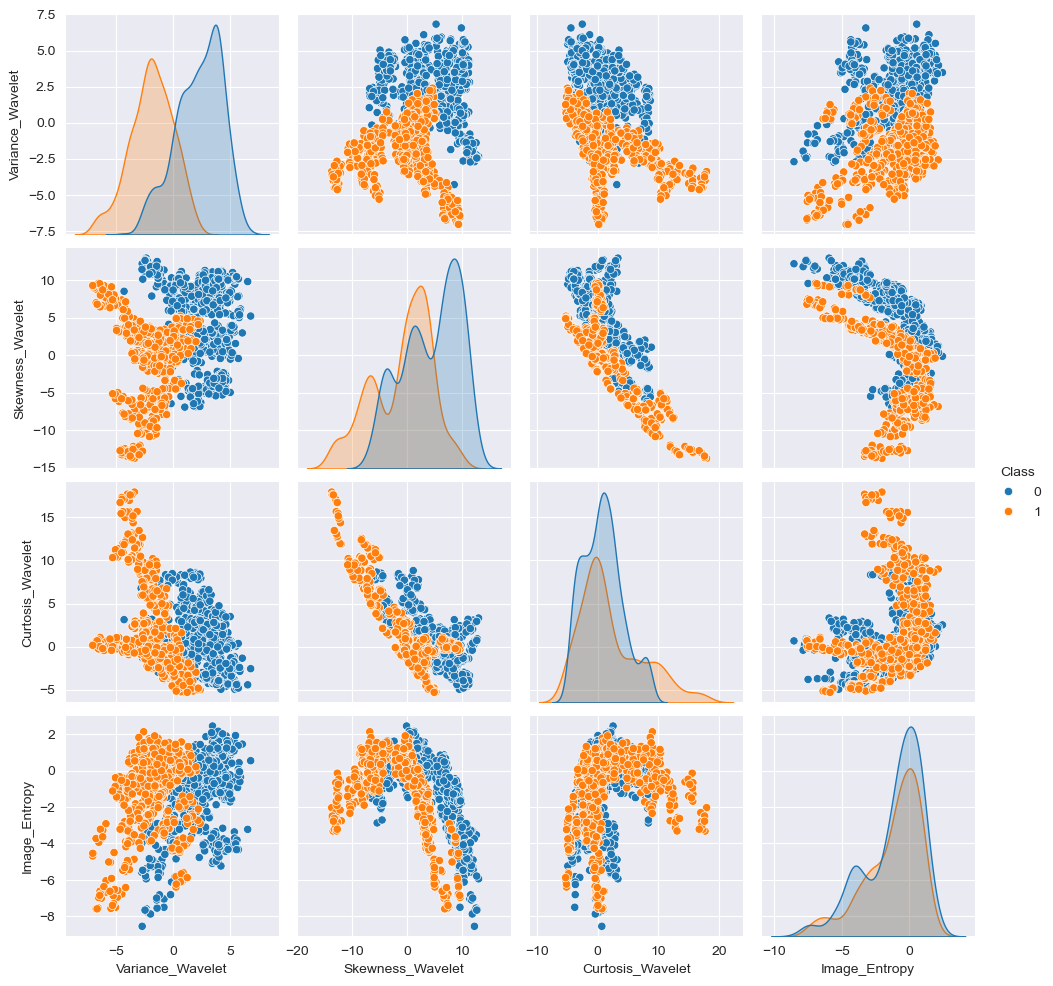

In [122]:
sns.pairplot(df, hue='Class')

In [123]:
X = df.drop('Class', axis=1)

In [124]:
y = df['Class']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
n_estimators = [64, 100, 128, 200]

In [130]:
max_features = [2, 3, 4]

In [131]:
bootstrap = [True, False]

In [132]:
oob_score = [True, False]

In [133]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
}

In [134]:
rfc = RandomForestClassifier()

In [135]:
grid = GridSearchCV(rfc, param_grid, verbose=2, n_jobs=-1)

In [136]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\ens

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]},
             verbose=2)

In [137]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [138]:
rfc = RandomForestClassifier(
    n_estimators=64, 
    max_features=2, 
    bootstrap=True, 
    oob_score=True,
)

In [139]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [140]:
rfc.oob_score_

0.9931389365351629

In [141]:
predictions = rfc.predict(X_test)

In [142]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

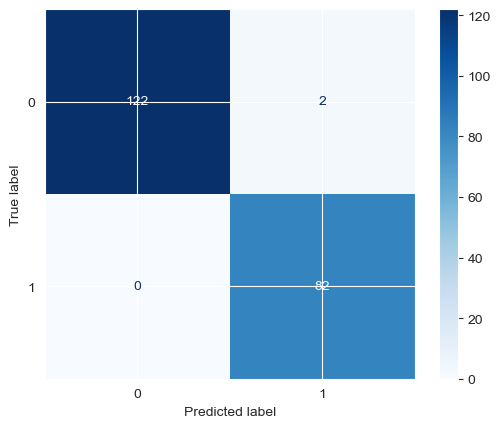

In [143]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=rfc.classes_).plot(cmap='Blues')

In [144]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [145]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [146]:
np.sum(y_test != predictions)

2

In [147]:
errors = []
misclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(
        n_estimators=n, 
        max_features=2, 
        n_jobs=-1,
    )
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

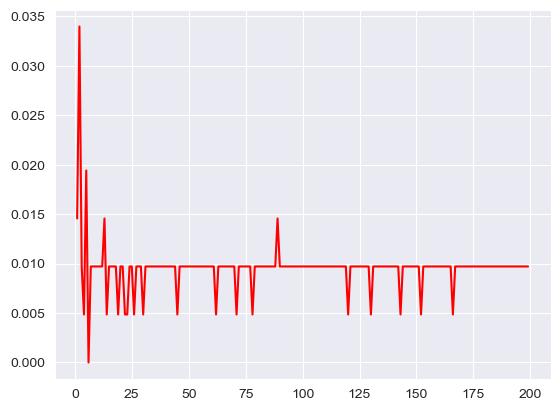

In [148]:
plt.plot(range(1, 200), errors, 'r')

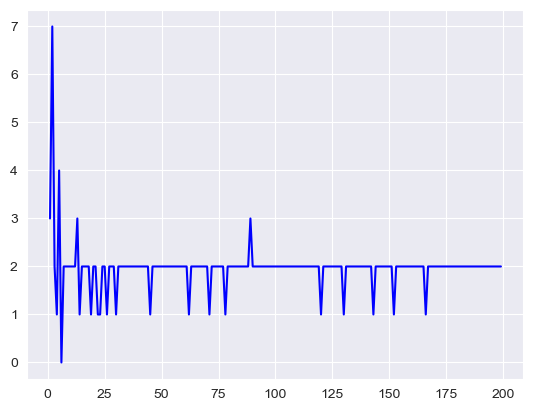

In [149]:
plt.plot(range(1, 200), misclassifications, 'b')

# 169. Coding Regression with Random Forest Regressor - Part One - Data

# 170. Coding Regression with Random Forest Regressor - Part Two - Basic Models

In [150]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [151]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [152]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

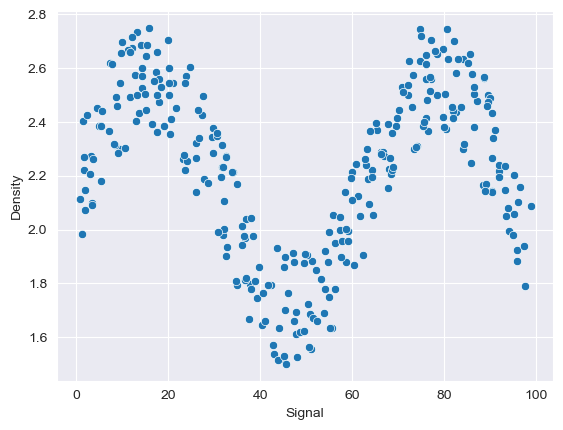

In [153]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [154]:
X = df[['Signal']]

In [155]:
y = df['Density']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
lr_model = LinearRegression()

In [160]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [161]:
lr_preds = lr_model.predict(X_test)

In [162]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [164]:
MSE = mean_squared_error(y_test, lr_preds)

In [165]:
MAE = mean_absolute_error(y_test, lr_preds)

In [166]:
print(f'MSE: {MSE}, MAE: {MAE}')

MSE: 0.0660516726514864, MAE: 0.211198973318633


In [167]:
np.sqrt(MSE)

0.2570051996584629

In [168]:
signal_range = np.arange(0, 100)

In [169]:
signal_range_df = pd.DataFrame(signal_range, columns=['Signal'])

In [170]:
signal_preds = lr_model.predict(signal_range_df)

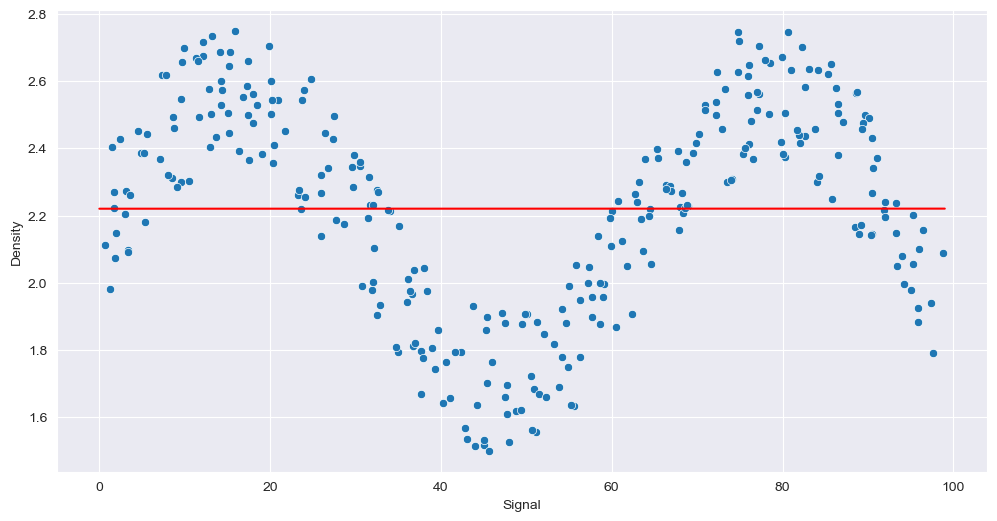

In [171]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds, 'r')

In [172]:
y_test

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: Density, dtype: float64

# 171. Coding Regression with Random Forest Regressor - Part Three - Polynomials

In [173]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE: {rmse}, MAE: {mae}')
    
    signal_range = np.arange(0, 100)
    output = pd.DataFrame(signal_range, columns=['Signal'])
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Signal', y='Density', data=df)
    plt.plot(signal_range, model.predict(output), 'r')


RMSE: 0.2570051996584629, MAE: 0.211198973318633


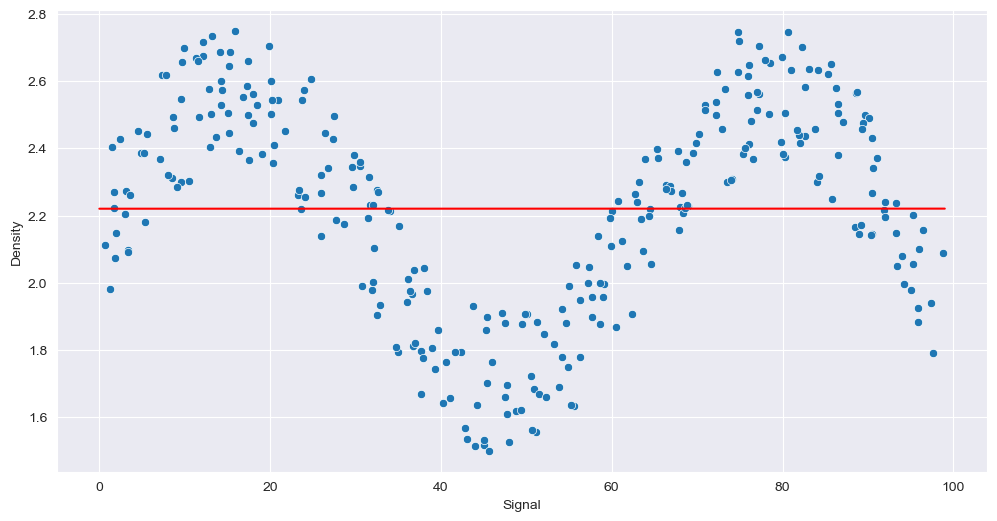

In [175]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [184]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

RMSE: 0.1380748568029506, MAE: 0.11969150609879194


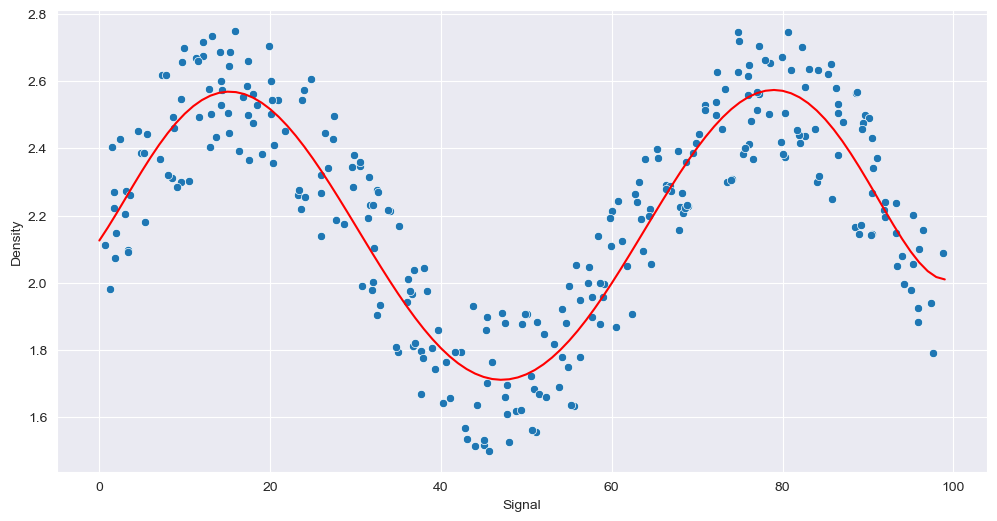

In [185]:
run_model(pipe, X_train, y_train, X_test, y_test)

# 172. Coding Regression with Random Forest Regressor - Part Four - Advanced Models

In [186]:
from sklearn.neighbors import KNeighborsRegressor

K: 1
RMSE: 0.1523487028635337, MAE: 0.11877297474442378
K: 5
RMSE: 0.13730685016923647, MAE: 0.12198383614100558
K: 10
RMSE: 0.13277855732740926, MAE: 0.11635971693292672
K: 30
RMSE: 0.15954234753677107, MAE: 0.13363165935705318


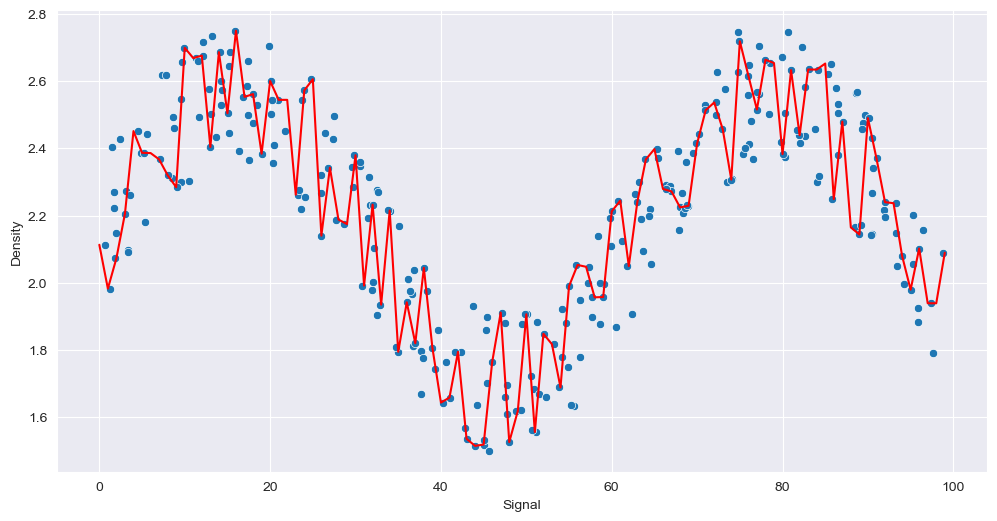

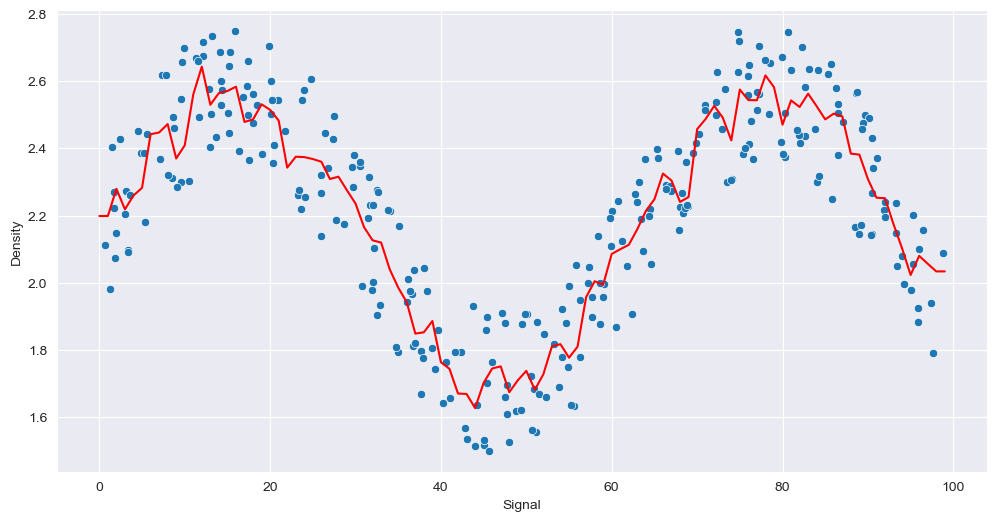

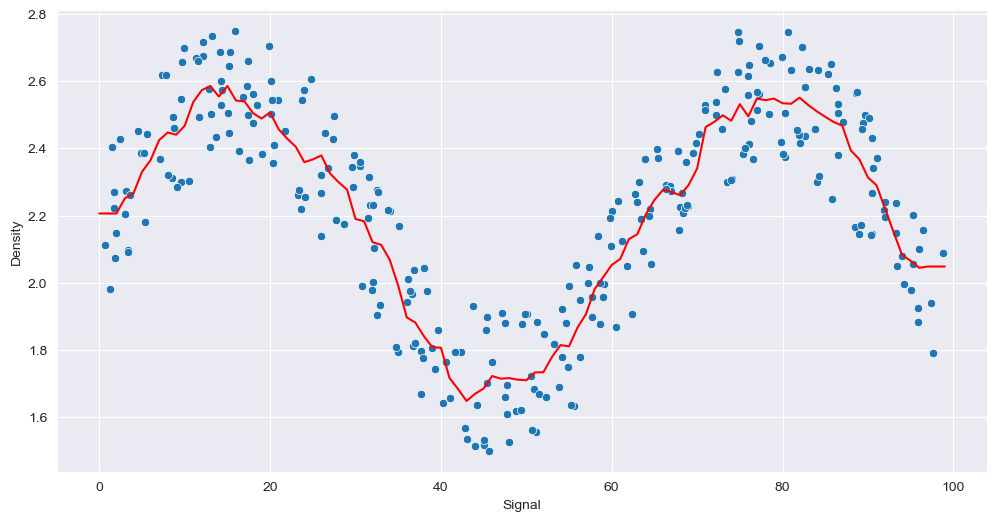

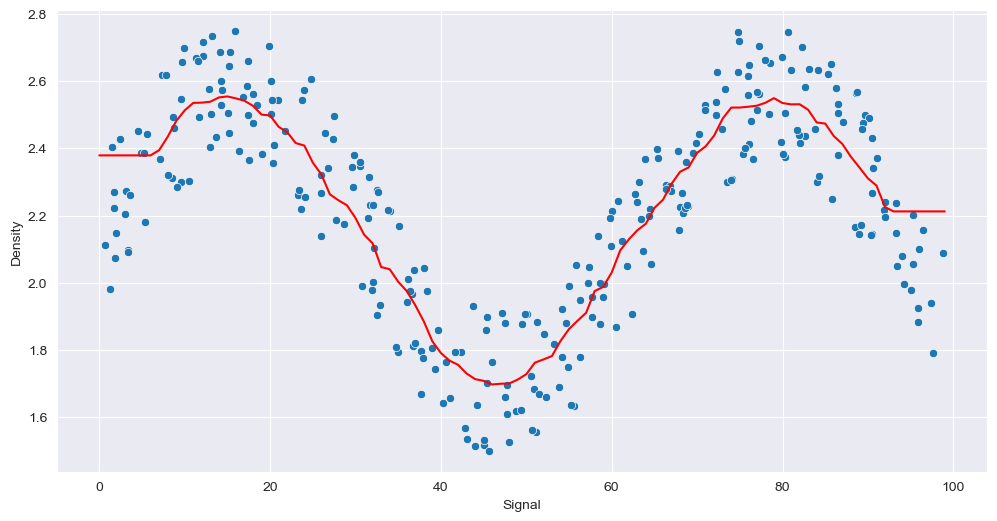

In [188]:
k_values = [1, 5, 10, 30]

for k in k_values:
    print(f'K: {k}')
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model, X_train, y_train, X_test, y_test)

In [189]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337, MAE: 0.11877297474442378


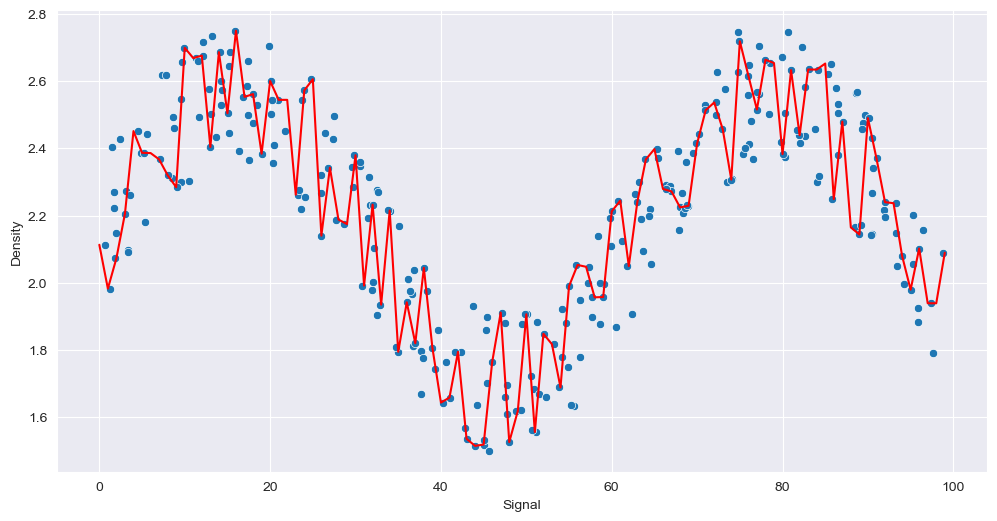

In [190]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [191]:
from sklearn.svm import SVR

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
svr = SVR()

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
}

grid = GridSearchCV(svr, param_grid, n_jobs=-1)

RMSE: 0.12646999302046696, MAE: 0.10854210121348368


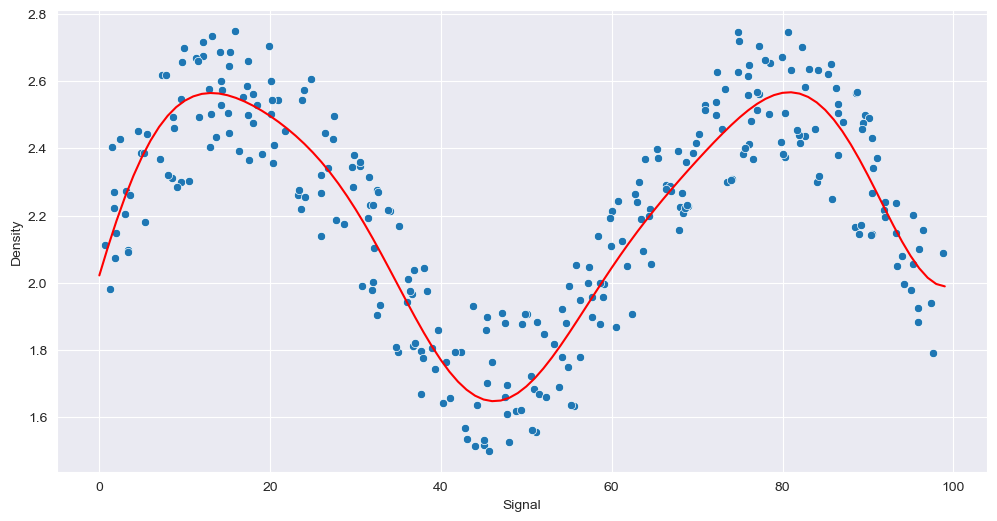

In [194]:
run_model(grid, X_train, y_train, X_test, y_test)

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)

RMSE: 0.13200287930809734, MAE: 0.11121988267763609


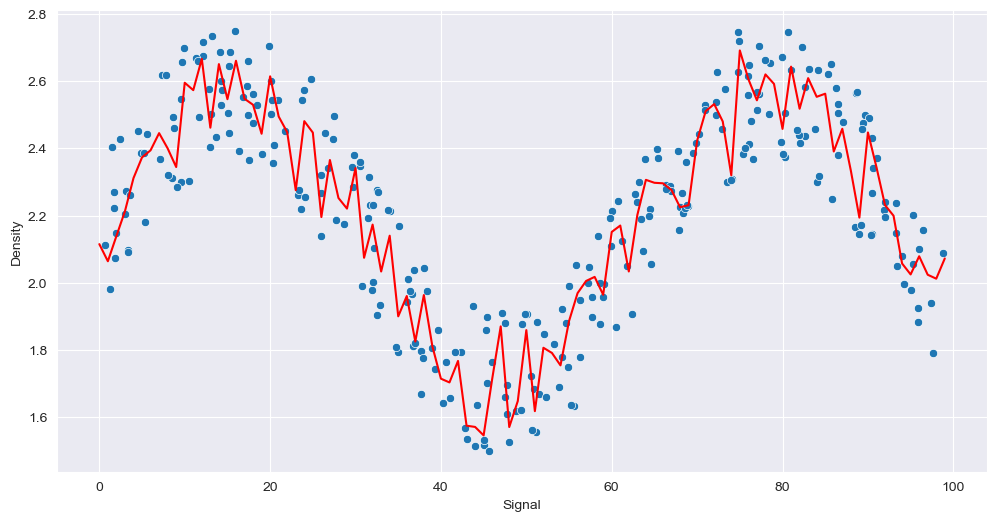

In [202]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [206]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [204]:
gbr = GradientBoostingRegressor(n_estimators=100)

RMSE: 0.13294148649584667, MAE: 0.11318284854800689


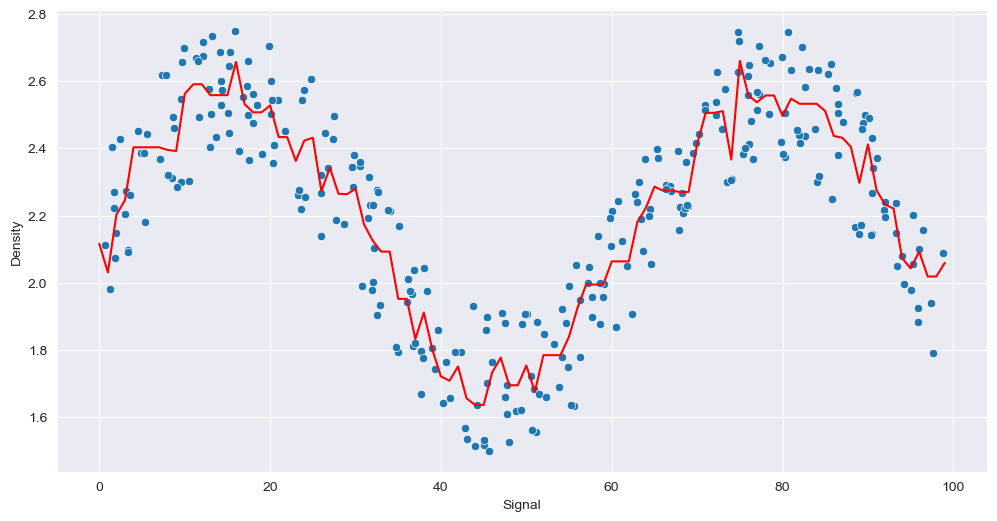

In [205]:
run_model(gbr, X_train, y_train, X_test, y_test)

In [207]:
model = AdaBoostRegressor()

RMSE: 0.13433007663189162, MAE: 0.11535357168578754


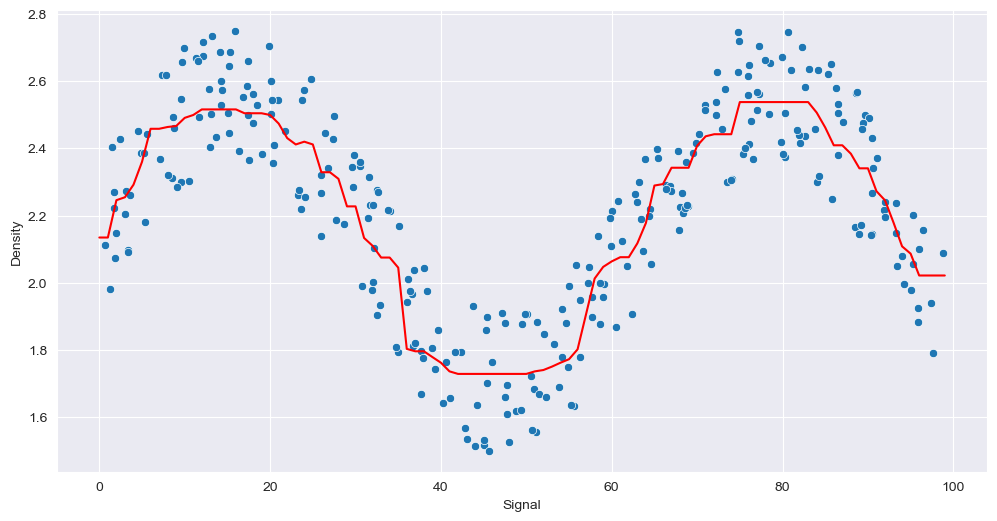

In [208]:
run_model(model, X_train, y_train, X_test, y_test)